# Topic Modeling With K-means and LDA

In [2]:
# need to clean the stopwords a little more

import nltk

stop = set(nltk.corpus.stopwords.words('english'))
# songs are about me, we, you - might be interesting to use them
mwy_words = set([u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', 
                 u'ourselves', u'you', u'your', u'yours', u'yourself',
                 u'yourselves', u'he', u'him', u'his', u'himself', u'she',
                 u'her', u'hers', u'herself'])
add_words = set(['got', 'on', 'go', 'get', 'come', 'make', 'would', 'cannot', 
                 'could', 'th', 'let', 'oh', 'ah', 'want', 'like', 'know', 'yeah', 'yah', 
                 'ya', 'going', 'way', 'cause', 'caus', 'la', 'lala', 'say', 'na', 'nana', 'u', 'see', 
                 'take', 'hey', 'us'])
# creating new set of stop words with me, we, you
stop_mwy = stop - mwy_words
stop_plus = stop | add_words
stop_mwy_plus = stop_mwy | add_words

In [3]:
# get stems

client = pymongo.MongoClient()
songs = client.lyrics.all_songs

full_corpus = []
index = []
for song in songs.find({}, {'stems': 1, "_id": 1}):
    # filter out spanish songs
    if 'que' in song['stems']:
        continue
    full_corpus.append(song['stems'])
    index.append(song['_id'])

In [4]:
from collections import defaultdict
frequency = defaultdict(int)
for text in full_corpus:
    for token in text:
        frequency[token] += 1
full_corpus = [[token for token in text if frequency[token] > 1 and token not in stop_plus] for text in full_corpus]

# Trying Gensim

In [5]:
dictionary = corpora.Dictionary(full_corpus)
corpus_vec = [dictionary.doc2bow(stems) for stems in full_corpus]
tfidf = TfidfModel(corpus_vec)
tfidf.save('tfidf_gensim.tfidf_model')
corpus_tfidf = tfidf[corpus_vec]

In [6]:
corpus_tfidf = matutils.corpus2csc(corpus_tfidf).transpose()

In [7]:
corpus_tfidf_array = corpus_tfidf.toarray()

In [8]:
terms = [dictionary[i] for i in range(len(dictionary))]

In [9]:
term_matrix = pd.DataFrame(corpus_tfidf_array, columns=terms)

In [ ]:
# Run Model, Pickle, and Print Output

In [86]:
def model_km(corpus_tfidf):
    num_range = [4, 8, 12, 16, 20, 24, 28]
    for num_clusters in num_range:
        km = KMeans(n_clusters=num_clusters, max_iter=400, n_jobs=-1)
        km.fit(corpus_tfidf)
        with file(str(num_clusters)+'_kmeans.pkl', 'w') as picklefile:
            pickle.dump(km, picklefile)
        print('Clusters: {}'.format(num_clusters))
        print('Inertia: {}'.format(km.inertia_))
        order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        for i in range(num_clusters):
            print("Cluster %d:" % i, end='')
            for ind in order_centroids[i, :10]:
                print(' %s,' % terms[ind], end='')
                most_common.append(terms[ind])
            print()
            

In [87]:
model_km(corpus_tfidf)

Clusters: 4
Inertia: 137733.801831
Cluster 0: away, never, time, love, feel, heart, life, one, day, tri,
Cluster 1: love, man, us, one, girl, hey, back, littl, well, time,
Cluster 2: nigga, fuck, bitch, shit, niggaz, yo, em, ass, hoe, money,
Cluster 3: babi, love, girl, need, feel, give, tell, heart, one, right,
Clusters: 8
Inertia: 136980.053011
Cluster 0: hey, christma, merri, santa, day, babi, girl, littl, tree, love,
Cluster 1: dream, fall, away, light, world, heart, sun, eye, rain, night,
Cluster 2: girl, man, love, back, one, littl, us, well, boy, look,
Cluster 3: love, heart, need, feel, give, never, true, one, babi, fall,
Cluster 4: tonight, right, night, feel, love, babi, alright, us, light, hold,
Cluster 5: never, time, feel, away, thing, think, one, tri, need, life,
Cluster 6: babi, girl, love, need, feel, tell, ooh, give, right, good,
Cluster 7: nigga, fuck, bitch, shit, niggaz, yo, em, ass, hoe, money,
Clusters: 12
Inertia: 136340.136222
Cluster 0: love, one, us, man, well

In [29]:
import pickle

with file('28_kmeans.pkl', 'r') as x:
    km = pickle.load(x)

In [89]:
km.inertia_

134662.0277134512

In [32]:
clusters = km.labels_
pd.Series(clusters).value_counts()

2     46373
19    23649
15    14549
13    10483
16     5184
5      4304
9      3833
21     3538
25     3418
10     3197
4      2919
24     2773
12     1889
23     1840
3      1619
27     1354
6      1320
8      1313
26     1175
11     1096
22      972
14      912
7       850
17      825
0       759
20      753
1       725
18      434
dtype: int64

In [92]:
from __future__ import print_function

order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

most_common = []

for i in range(28):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :20]:
        print(' %s,' % terms[ind], end='')
        most_common.append(terms[ind])
    print()

Cluster 0: di, mi, dem, yuh, che, e, fi, non, nuh, il, inna, gal, un, seh, per, pon, mek, te, weh, piu,
Cluster 1: christma, merri, santa, mistleto, snow, tree, bell, year, sleigh, carol, day, yuletid, eve, white, bright, happi, present, dream, christmas, wish,
Cluster 2: love, one, us, man, well, littl, feel, time, back, danc, look, never, world, babi, said, need, day, home, hand, live,
Cluster 3: wait, long, time, love, day, feel, one, need, life, hold, right, babi, never, night, back, still, heart, forev, tell, away,
Cluster 4: nigga, shit, fuck, bitch, yo, em, ass, motherfuck, money, wit, hoe, niggaz, man, gon, real, thug, hit, game, back, hood,
Cluster 5: heart, break, love, apart, broken, feel, fall, tear, never, hold, one, give, time, insid, need, believ, cri, start, still, hurt,
Cluster 6: hey, babi, girl, love, littl, back, tell, feel, away, man, need, world, time, one, look, said, right, well, day, think,
Cluster 7: alright, everyth, feel, night, tonight, babi, love, right, t

In [31]:
years = []

for iden in index:
    song = songs.find({'_id': iden}, {'a_album_year': 1}).next()
    years.append(song['a_album_year'])


In [33]:
year_cluster_df = pd.DataFrame({'years': years, 'clusters': clusters})
year_cluster_df.head()

,clusters,years
0,2,1997
1,26,1997
2,2,1997
3,19,1997
4,2,1997


In [34]:
group_year = year_cluster_df.groupby('years')
group_year.head()
#group_year['weight'] = group_year['clusters']/group_year.count()
#group_year.hist(normed=True, bins=28)
weights = group_year.count()['clusters']
def plot_year(year):
    plt.figure()
    x = (group_year.get_group(year)['clusters'].value_counts()/weights[year]).index
    y = group_year.get_group(year)['clusters'].value_counts()/weight[year]
    plt.bar(x, y)

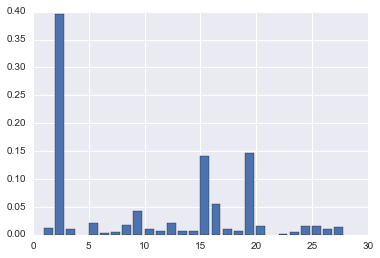

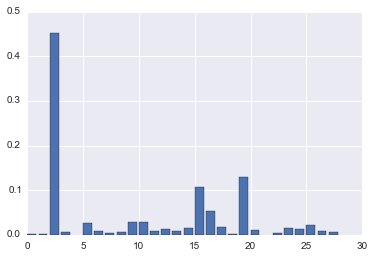

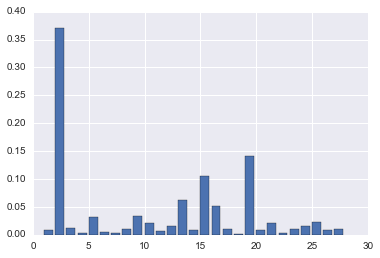

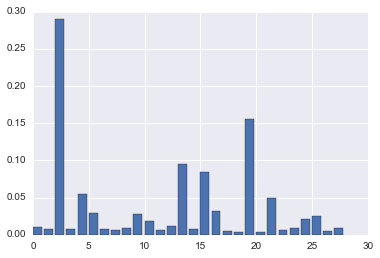

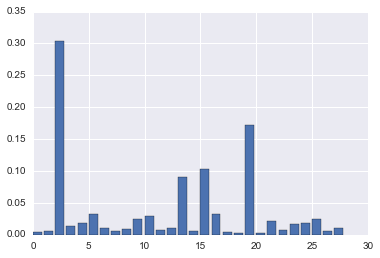

In [198]:
plot_year(1970)
plot_year(1980)
plot_year(1990)
plot_year(2000)
plot_year(2010)

In [44]:
group_year.get_group(1990)['clusters'].value_counts().sort_index().axes

[Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
             18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
            dtype='int64')]

In [58]:
heat_dict = {}
for year in range(1960, 2011):
    series = group_year.get_group(year)['clusters'].value_counts()
    for i in range(28):
        if i not in series.axes[0]:
            series = series.append(pd.Series(0, index=[i]))
    heat_dict[year] = series.sort_index()

In [121]:
import collections

od = collections.OrderedDict(sorted(heat_dict.items()))


heat_list_norm = [(od[year]/float(sum(od[year].tolist()))).tolist() for year in range(1960, 2011)]
for sub in heat_list_norm:
    # remove cluster 2
    del sub[2]


27

In [122]:
print(__doc__)

sns.set_style("whitegrid", {'axes.grid' : False})

def plot_heat_map(cm, title='Cluster Distribution Over Time', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar(fraction=0.046, pad=0.04)
    tick_marks_y = np.arange(len(range(0, 2))+len(range(3, 28)))
    tick_marks_x = np.arange(len(range(1960, 2011)))
    plt.yticks(tick_marks_y, range(0, 2)+range(3, 28), fontsize=16)
    plt.xticks(tick_marks_x, range(1960, 2011), rotation=45, fontsize=16)
    plt.tight_layout()
    plt.ylabel('Cluster Distribution', fontsize=16)
    plt.xlabel('Year', fontsize=16)

Automatically created module for IPython interactive environment


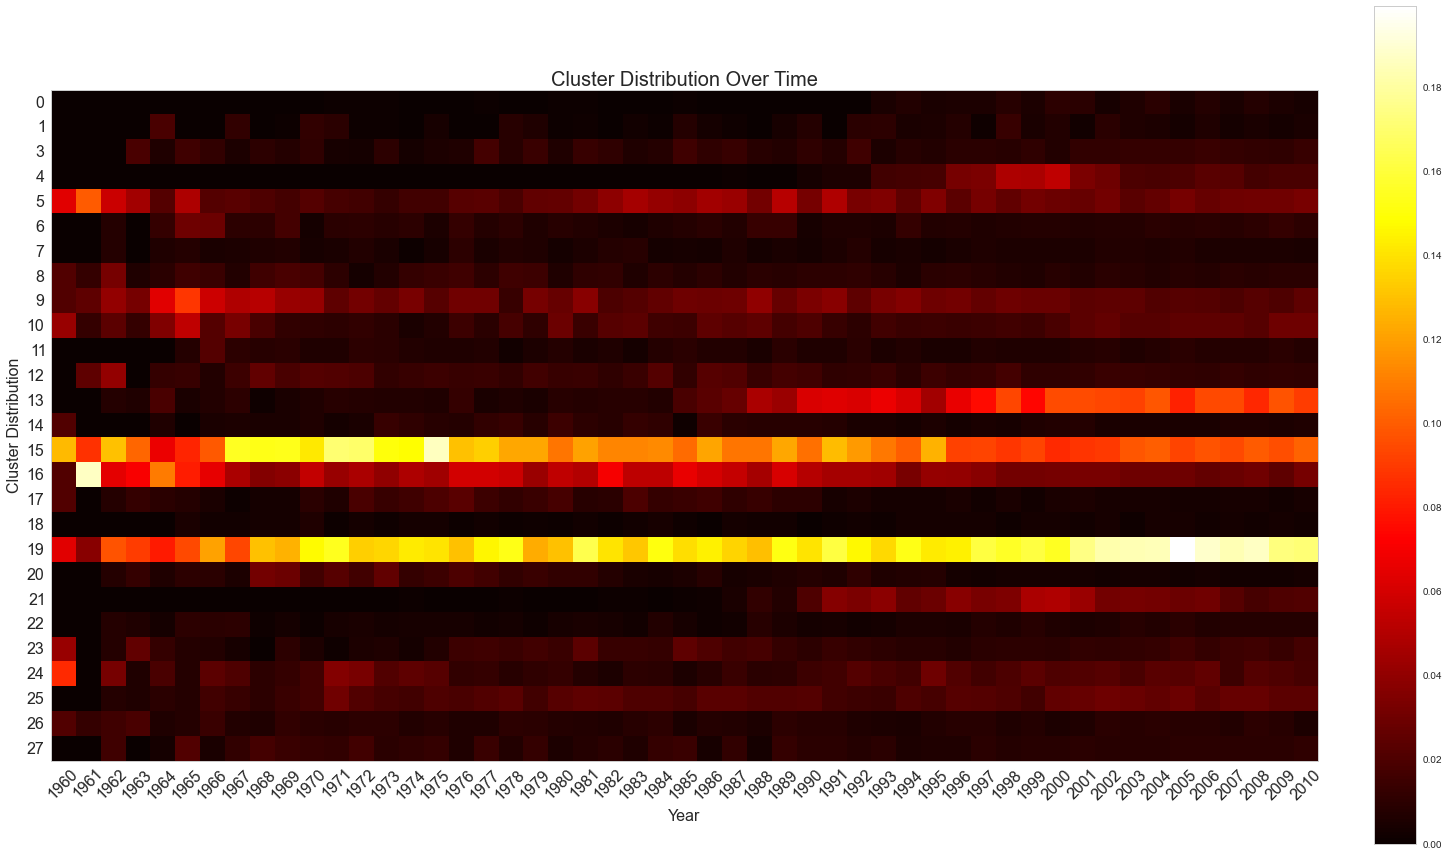

In [125]:
plt.figure(figsize=(20, 12))
plot_heat_map(np.array(heat_list_norm).T, cmap=plt.cm.hot)

# Trying LDA Topic Modeling

In [11]:
from gensim.models.ldamulticore import LdaMulticore

In [221]:
def run_lda(corpus_vec, dictionary):
    num_topics_list = [14, 16, 20]
    for num_topics in num_topics_list:
        lda = LdaMulticore(corpus_vec, id2word=dictionary, num_topics=num_topics)
        lda.save(str(num_topics)+'_lda.model')
        lda.print_topics(num_topics=num_topics, num_words=10)

In [ ]:
run_lda(corpus_vec, dictionary)

In [26]:
lda = LdaMulticore.load('10_lda.model')

In [114]:
topics = lda.print_topics(num_topics=10, num_words=10)

In [116]:
for topic in topics:
    print topic[0], topic[1]

0 0.011*home + 0.010*day + 0.010*back + 0.009*love + 0.007*well + 0.007*dream + 0.007*cri + 0.007*sing + 0.006*man + 0.006*one
1 0.023*feel + 0.014*night + 0.014*love + 0.012*fall + 0.011*light + 0.011*danc + 0.011*tonight + 0.011*world + 0.010*good + 0.010*keep
2 0.018*one + 0.009*peopl + 0.009*time + 0.008*world + 0.005*back + 0.005*turn + 0.004*god + 0.004*life + 0.004*live + 0.004*new
3 0.024*time + 0.020*never + 0.015*away + 0.014*feel + 0.011*tri + 0.010*life + 0.010*day + 0.010*thing + 0.010*think + 0.010*one
4 0.011*money + 0.009*niggaz + 0.009*nigga + 0.009*bitch + 0.009*fuck + 0.006*never + 0.006*shit + 0.006*back + 0.006*em + 0.005*run
5 0.019*nigga + 0.012*boy + 0.009*em + 0.009*man + 0.008*back + 0.008*yo + 0.006*live + 0.006*real + 0.005*time + 0.005*die
6 0.014*believ + 0.009*pleas + 0.008*heart + 0.008*burn + 0.008*world + 0.008*life + 0.008*love + 0.007*live + 0.007*run + 0.007*look
7 0.080*love + 0.042*babi + 0.022*girl + 0.022*need + 0.016*one + 0.014*give + 0.013*te